In [3]:
#DATASET
df = pd.read_csv("/content/insurance.csv")

In [4]:
# EDA AND DATA VISUALISATION
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
x

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [6]:
y


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import datetime
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import warnings
import seaborn as sns
warnings.filterwarnings("ignore", category=UserWarning)
import plotly.express as px

<Axes: xlabel='bmi', ylabel='Density'>

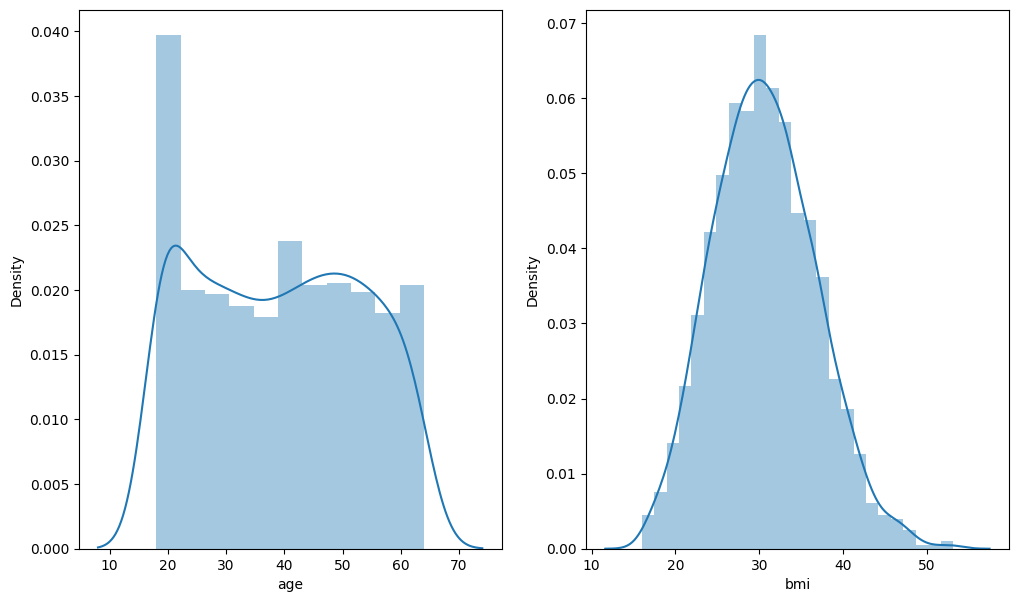

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
sns.distplot(x.age,kde = True,ax = axs[0])
sns.distplot(x.bmi,kde = True,ax = axs[1])

In [8]:
r = df.groupby('region')['region'].count()
r

,region
region,
northeast,324
northwest,325
southeast,364
southwest,325


In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
s1 = df.groupby('smoker')['smoker'].count()
s2 = df.groupby('children')['children'].count()
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])
pie_trace1 = go.Pie(values=s1.values, labels=s1.index, name="Smoker")
pie_trace2 = go.Pie(values=s2.values, labels=s2.index, name="Sex")
fig.add_trace(pie_trace1, row=1, col=1)
fig.add_trace(pie_trace2, row=1, col=2)
fig.update_layout(
    template='plotly_dark'
)
fig.add_annotation(
    text='Smoker Distribution',
    x=0.1, y=1.08,  # Adjust x and y to position the text
    xref='paper', yref='paper',
    showarrow=False,
    font=dict(size=18)
)

fig.add_annotation(
    text='Number of children Distribution',
    x=0.95, y=1.08,  # Adjust x and y to position the text
    xref='paper', yref='paper',
    showarrow=False,
    font=dict(size=18)
),
template='plotly_dark'

fig.show()

In [10]:
# Data Preprocessing
le = LabelEncoder()
x['sex'] = le.fit_transform(x['sex'])
x['smoker'] = le.fit_transform(x['smoker'])

In [11]:
x= pd.get_dummies(x,columns = ['region'],dtype = float)

In [12]:
x

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,0.0,0.0,0.0,1.0


In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=  0.8,random_state = 42)

In [14]:
sc = MinMaxScaler()
x_train[['bmi','age']] = sc.fit_transform(x_train[['bmi','age']].values)
x_test[['bmi','age']] = sc.transform(x_test[['bmi','age']].values)
sc2 = MinMaxScaler()
y_train = sc2.fit_transform(y_train.values.reshape(-1,1))
y_test = sc2.transform(y_test.values.reshape(-1,1))

In [15]:
x_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
560,0.608696,0,0.107345,2,0,0.0,1.0,0.0,0.0
1285,0.630435,0,0.224913,0,0,1.0,0.0,0.0,0.0
1142,0.739130,0,0.239440,0,0,0.0,0.0,1.0,0.0
969,0.456522,0,0.493947,5,0,0.0,0.0,1.0,0.0
486,0.782609,0,0.148238,3,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1095,0.000000,0,0.414044,4,0,1.0,0.0,0.0,0.0
1130,0.456522,0,0.212806,5,0,0.0,0.0,1.0,0.0
1294,0.869565,1,0.247915,0,0,1.0,0.0,0.0,0.0
860,0.413043,0,0.851224,2,1,0.0,0.0,0.0,1.0


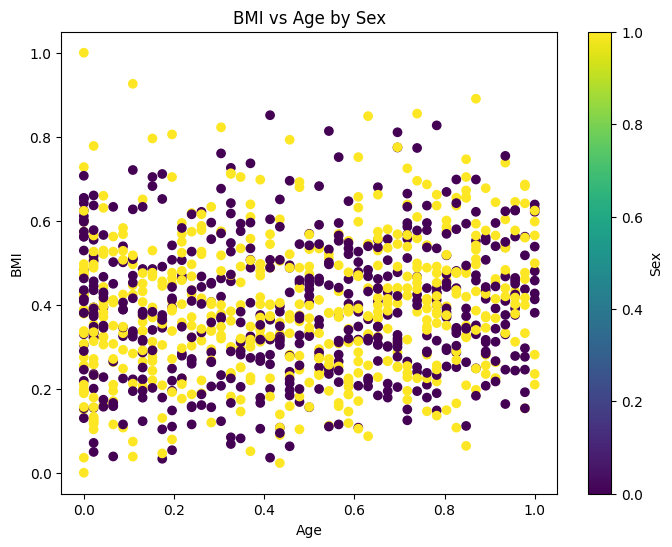

In [34]:
# @title BMI vs Age by Sex

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(x_train['age'], x_train['bmi'], c=x_train['sex'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('BMI vs Age by Sex')
_ = plt.colorbar(label='Sex')


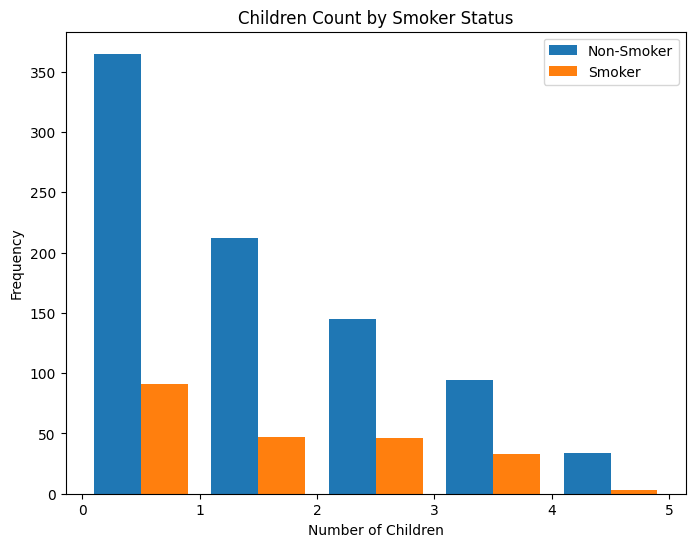

In [33]:
# @title Children Count by Smoker Status

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist([x_train[x_train['smoker'] == 0]['children'], x_train[x_train['smoker'] == 1]['children']], bins=range(6), label=['Non-Smoker', 'Smoker'])
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.title('Children Count by Smoker Status')
_ = plt.legend()


In [25]:
#Building ANN
ann  =tf.keras.Sequential()
ann.add(tf.keras.layers.Dense(10 , activation = 'tanh'))

In [26]:
ann.add(tf.keras.layers.Dense(6 , activation = 'tanh'))
ann.add(tf.keras.layers.Dense(1))

In [27]:
ann.compile(loss=tf.keras.losses.mae,
            optimizer=tf.keras.optimizers.SGD(),
            metrics=["mse"])

In [31]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',
                                              patience=5,start_from_epoch=0,restore_best_weights=True)
hist =ann.fit(x_train,y_train,epochs = 200, batch_size = 16,callbacks=[callback],validation_data= (x_test,y_test))

Epoch 1/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0635 - mse: 0.0120 - val_loss: 0.0645 - val_mse: 0.0114
Epoch 2/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0582 - mse: 0.0106 - val_loss: 0.0612 - val_mse: 0.0118
Epoch 3/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0603 - mse: 0.0113 - val_loss: 0.0603 - val_mse: 0.0116
Epoch 4/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0593 - mse: 0.0110 - val_loss: 0.0584 - val_mse: 0.0114
Epoch 5/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0582 - mse: 0.0110 - val_loss: 0.0613 - val_mse: 0.0116
Epoch 6/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0550 - mse: 0.0102 - val_loss: 0.0579 - val_mse: 0.0113
Epoch 7/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0563 - mse: 0.0099 - val_loss: 0.0642 - val_mse: 0.0119
Epoch 8/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0563 - mse: 0.0103 - val_loss: 0.0584 - val_mse: 0.0112
Epoch 9/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.061

In [32]:
y_pred = ann.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [30]:
mae = tf.keras.losses.MeanAbsoluteError()
loss = mae(y_test, y_pred)
loss_value = loss.numpy()
print(1-loss_value)

0.9418697841465473


In [22]:
ann.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0502 - mse: 0.0092 


[0.05258294567465782, 0.010423588566482067]

Text(0, 0.5, 'Loss')

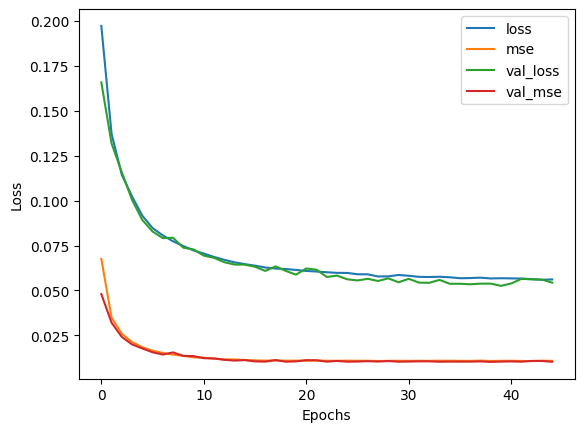

In [23]:
pd.DataFrame(hist.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")